<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/IX_MR_Control_Chart_imported_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates how you can plot EWMA Control Chart.
Note that this code should work for the Phase I & II of control charting.
The example data set has n=5; however, it is converted into n=1.
Example 6-1 from Montgomery Intro to SQC 7ed
Ref. https://www.kaggle.com/nalkrolu/statistical-process-control-quality-control#EWMA-Control-Chart

In [ ]:
# Import required libraries
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# retrive data for Example 6.1
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/ch06example1.csv', sep=',', na_values=".")
#generate the Phase I data using filter
#use the first 30 observations to setup the control charts
dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] < 31]]
#dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data[0:31]]

#retrieve the Phase II data
dataII= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] >= 31]]

#all data points; the data type is a list
dataAll=[data[['x1', 'x2', 'x3', 'x4','x5']]]

dataI

[        x1      x2      x3      x4      x5
 0   1.3235  1.4128  1.6744  1.4573  1.6914
 1   1.4314  1.3592  1.6075  1.4666  1.6109
 2   1.4284  1.4871  1.4932  1.4324  1.5674
 3   1.5028  1.6352  1.3841  1.2831  1.5507
 4   1.5604  1.2735  1.5265  1.4363  1.6441
 5   1.5955  1.5451  1.3574  1.3281  1.4198
 6   1.6274  1.5064  1.8366  1.4177  1.5144
 7   1.4190  1.4303  1.6637  1.6067  1.5519
 8   1.3884  1.7277  1.5355  1.5176  1.3688
 9   1.4039  1.6697  1.5089  1.4627  1.5220
 10  1.4158  1.7667  1.4278  1.5928  1.4181
 11  1.5821  1.3355  1.5777  1.3908  1.7559
 12  1.2856  1.4106  1.4447  1.6398  1.1928
 13  1.4951  1.4036  1.5893  1.6458  1.4969
 14  1.3589  1.2863  1.5996  1.2497  1.5471
 15  1.5747  1.5301  1.5171  1.1839  1.8662
 16  1.3680  1.7269  1.3957  1.5014  1.4449
 17  1.4163  1.3864  1.3057  1.6210  1.5573
 18  1.5796  1.4185  1.6541  1.5116  1.7247
 19  1.7106  1.4412  1.2361  1.3820  1.7601
 20  1.4371  1.5051  1.3485  1.5670  1.4880
 21  1.4738  1.5936  1.6583  1.4

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataI, (30,5))
x

array([[1.3235, 1.4128, 1.6744, 1.4573, 1.6914],
       [1.4314, 1.3592, 1.6075, 1.4666, 1.6109],
       [1.4284, 1.4871, 1.4932, 1.4324, 1.5674],
       [1.5028, 1.6352, 1.3841, 1.2831, 1.5507],
       [1.5604, 1.2735, 1.5265, 1.4363, 1.6441],
       [1.5955, 1.5451, 1.3574, 1.3281, 1.4198],
       [1.6274, 1.5064, 1.8366, 1.4177, 1.5144],
       [1.419 , 1.4303, 1.6637, 1.6067, 1.5519],
       [1.3884, 1.7277, 1.5355, 1.5176, 1.3688],
       [1.4039, 1.6697, 1.5089, 1.4627, 1.522 ],
       [1.4158, 1.7667, 1.4278, 1.5928, 1.4181],
       [1.5821, 1.3355, 1.5777, 1.3908, 1.7559],
       [1.2856, 1.4106, 1.4447, 1.6398, 1.1928],
       [1.4951, 1.4036, 1.5893, 1.6458, 1.4969],
       [1.3589, 1.2863, 1.5996, 1.2497, 1.5471],
       [1.5747, 1.5301, 1.5171, 1.1839, 1.8662],
       [1.368 , 1.7269, 1.3957, 1.5014, 1.4449],
       [1.4163, 1.3864, 1.3057, 1.621 , 1.5573],
       [1.5796, 1.4185, 1.6541, 1.5116, 1.7247],
       [1.7106, 1.4412, 1.2361, 1.382 , 1.7601],
       [1.4371, 1.50

In [ ]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x1=x.flatten()

In [ ]:
# process mean is computed assuming it is stationary
x1.mean()

1.503744

In [ ]:
# this class define how IX MR chart is plotted
class MR_ControlChart:
    
    def fit(self,data, point):
        # data is the Phase I data
        # point is the Phase II or all dataset
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))
        self.Y = point
        self.number_of_sample2 = len(self.Y)
        self.mR2 = np.zeros(((self.number_of_sample2-1),1))

        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])

        for i in range(len(self.mR2)):
            self.mR2[i] = abs(self.Y[i+1] - self.Y[i])
    
    def ControlChart(self,d2,D4,D3):
        
        ucl_X   = self.X.mean() + (3/d2)*self.mR.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - (3/d2)*self.mR.mean()

        ucl_mR   = D4*self.mR.mean()
        cl_mR    = self.mR.mean() 
        lcl_mR   = D3*self.mR.mean()
        

        plt.figure(figsize=(15,5))
        plt.plot(self.Y,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.Y),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.Y),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.Y),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.Y)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR2 ,marker="o",color="k",label="mR ")
        plt.plot([ucl_mR ]*len(self.Y),color="r",label="UCL={}".format(ucl_mR.round(2)))
        plt.plot([cl_mR ]*len(self.Y),color="b",label="CL={}".format(cl_mR.round(2)))
        plt.plot([lcl_mR ]*len(self.Y),color="r",label="LCL={}".format(lcl_mR.round(2)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.Y)))
        plt.legend()
        plt.show()
  

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  30


In [ ]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.9727 for n=5
c4=0.9727
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  1.503744
process standard deviation is,  0.11969572880820827


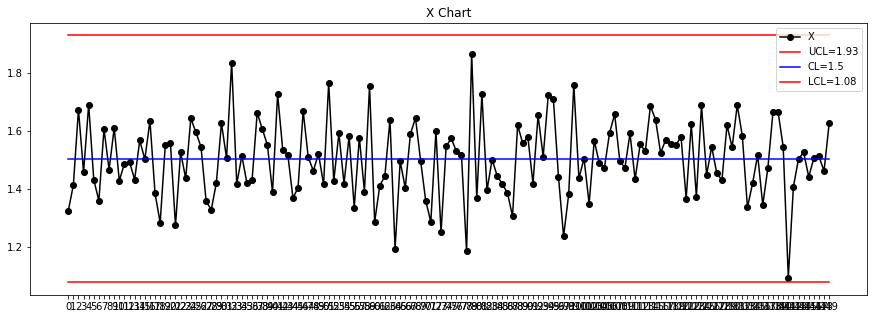

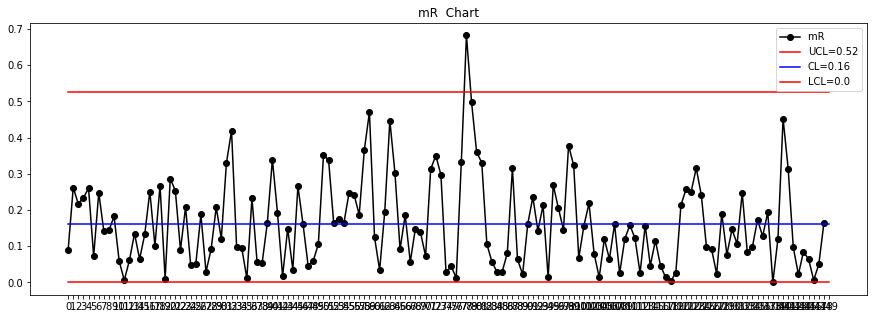

In [ ]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# EWMA chart parameters are lamda and L
chart = MR_ControlChart()
chart.fit(data=x1, point=x1)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

# **Now we will use the mean and sigma estimated from the Phase I process above and plot all data**

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x2=np.reshape(dataAll, (45,5))
#x2

In [ ]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x2=x2.flatten()

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=45
x3=np.reshape(dataAll, (45,5))
# Define list variable for groups means
x_bar2 = []

# Define list variable for groups ranges
s2 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x2:
    x_bar2.append(group.mean())
    s2.append(np.std(group))

m=len(x_bar2)
print('points in x, ', m)

points in x,  225


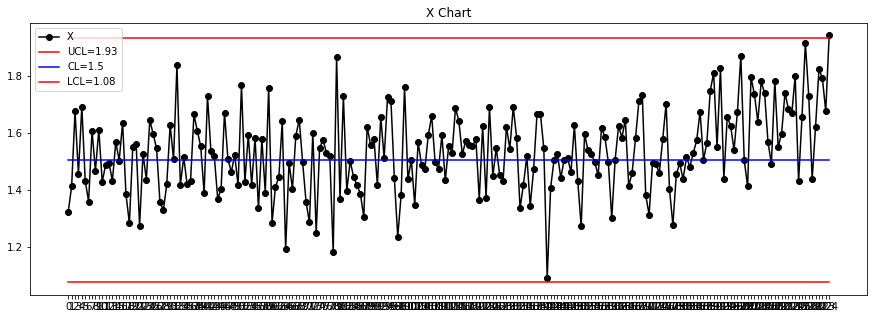

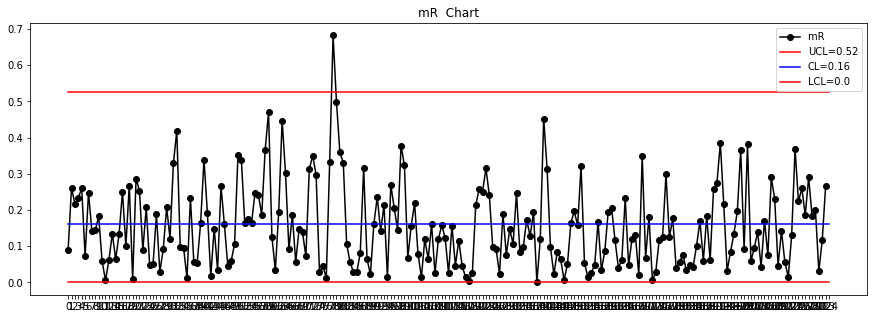

In [ ]:
# This chart is for both Phase I or Phase II assuming all mean and sigma are estimated in Phase I
# IX MR chart parameters are lamda and L
chart = MR_ControlChart()
chart.fit(data=x1, point=x2)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Note that the UCL of the IX chart is the same for both the Phase I and II charts. However, the IX chart in Phase II does not show out of control until the last point. The IX chart is not very sensitive for detecting small shifts.